In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Understand the dataset:

Identify the shape of the dataset

Identify variables with null values

2. Perform basic data exploratory analysis:

Utilize missing value treatment

Analyze the date column and remove the entries if it has an incorrect timeline

Draw a frequency plot for city-wise complaints

Draw scatter and hexbin plots for complaint concentration across Brooklyn

3. Find major types of complaints:

Plot a bar graph of count vs. complaint types

Find the top 10 types of complaints

Display the types of complaints in each city in a separate dataset

 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

1. Understand the dataset:

Identify the shape of the dataset

Identify variables with null values

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2032\1184982148.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape

(364558, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

Analyze the date column and remove the entries if it has an incorrect timeline

In [7]:
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [8]:
df.drop(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2','Resolution Description', 
     'Resolution Action Updated Date','Community Board','X Coordinate (State Plane)','School or Citywide Complaint',
    'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','School Name', 'School Number', 
              'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found','Ferry Direction', 'Ferry Terminal Name','Unique Key','Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'], axis=1,inplace=True)

In [9]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Borough', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [10]:
df.isna().sum(axis=0)

Created Date                       0
Closed Date                     2381
Agency                             0
Agency Name                        0
Complaint Type                     0
Descriptor                      6501
Location Type                    133
Incident Zip                    2998
Address Type                    3252
City                            2997
Landmark                      364183
Facility Type                   2389
Status                             0
Due Date                           3
Borough                            0
Y Coordinate (State Plane)      4030
Park Facility Name                 0
Park Borough                       0
Latitude                        4030
Longitude                       4030
Location                        4030
dtype: int64

In [11]:
df['Descriptor'].describe()

count        358057
unique           45
top       No Access
freq          75888
Name: Descriptor, dtype: object

In [12]:
df['Descriptor'].value_counts().head()

No Access                        75888
Loud Music/Party                 69708
Posted Parking Sign Violation    27200
Partial Access                   24993
Loud Talking                     23810
Name: Descriptor, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Loud Music/Party'),
 Text(1, 0, 'No Access'),
 Text(2, 0, 'Commercial Overnight Parking'),
 Text(3, 0, 'Blocked Sidewalk'),
 Text(4, 0, 'Posted Parking Sign Violation'),
 Text(5, 0, 'Blocked Hydrant'),
 Text(6, 0, 'With License Plate'),
 Text(7, 0, 'Partial Access'),
 Text(8, 0, 'Unauthorized Bus Layover'),
 Text(9, 0, 'Double Parked Blocking Vehicle'),
 Text(10, 0, 'Double Parked Blocking Traffic'),
 Text(11, 0, 'Vehicle'),
 Text(12, 0, 'Loud Talking'),
 Text(13, 0, 'Banging/Pounding'),
 Text(14, 0, 'Car/Truck Music'),
 Text(15, 0, 'Tortured'),
 Text(16, 0, 'In Prohibited Area'),
 Text(17, 0, 'Congestion/Gridlock'),
 Text(18, 0, 'Neglected'),
 Text(19, 0, 'Car/Truck Horn'),
 Text(20, 0, 'In Public'),
 Text(21, 0, 'Other (complaint details)'),
 Text(22, 0, 'No Shelter'),
 Text(23, 0, 'Truck Route Violation'),
 Text(24, 0, 'Unlicensed'),
 Text(25, 0, 'Overnight Commercial Storage'),
 Text(26, 0, 'Engine Idling'),
 Text(27, 0, 'After Hours - Licensed Est'),
 Text(28, 0, 'Det

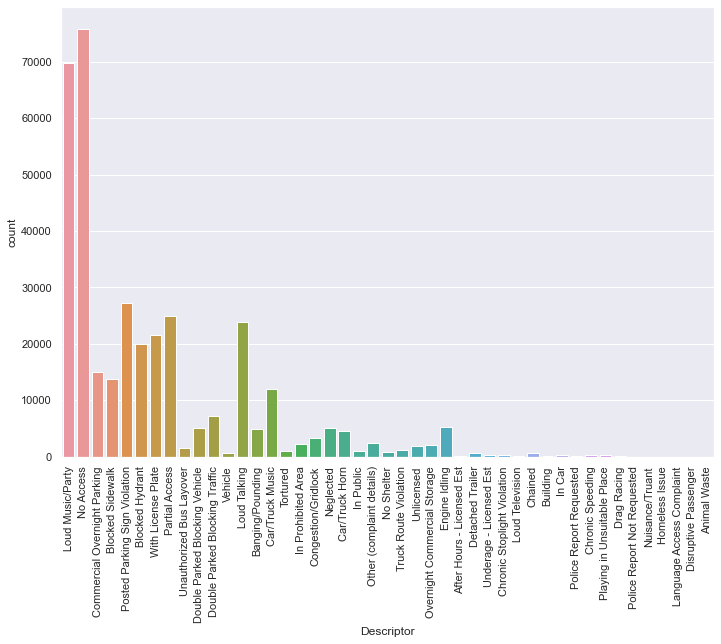

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot1=sns.countplot(df['Descriptor'])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

Plot a bar graph of count vs. complaint types

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Illegal Parking'),
 Text(3, 0, 'Derelict Vehicle'),
 Text(4, 0, 'Noise - Commercial'),
 Text(5, 0, 'Noise - House of Worship'),
 Text(6, 0, 'Posting Advertisement'),
 Text(7, 0, 'Noise - Vehicle'),
 Text(8, 0, 'Animal Abuse'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Traffic'),
 Text(11, 0, 'Drinking'),
 Text(12, 0, 'Bike/Roller/Skate Chronic'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Noise - Park'),
 Text(15, 0, 'Homeless Encampment'),
 Text(16, 0, 'Urinating in Public'),
 Text(17, 0, 'Graffiti'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks'),
 Text(20, 0, 'Ferry Complaint'),
 Text(21, 0, 'Agency Issues'),
 Text(22, 0, 'Squeegee'),
 Text(23, 0, 'Animal in a Park')]

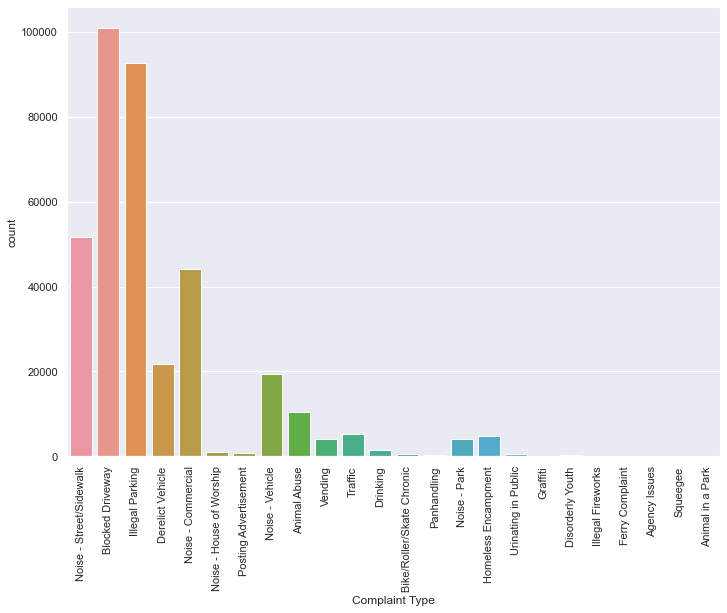

In [14]:
df['Complaint Type'].value_counts().head()
plot2=sns.countplot(df['Complaint Type'])
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)


Find the top 10 types of complaints

Display the types of complaints in each city in a separate dataset

In [15]:
complaints=df['Complaint Type'].value_counts().head()
complaints

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Name: Complaint Type, dtype: int64

In [16]:
complaints.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

<AxesSubplot:>

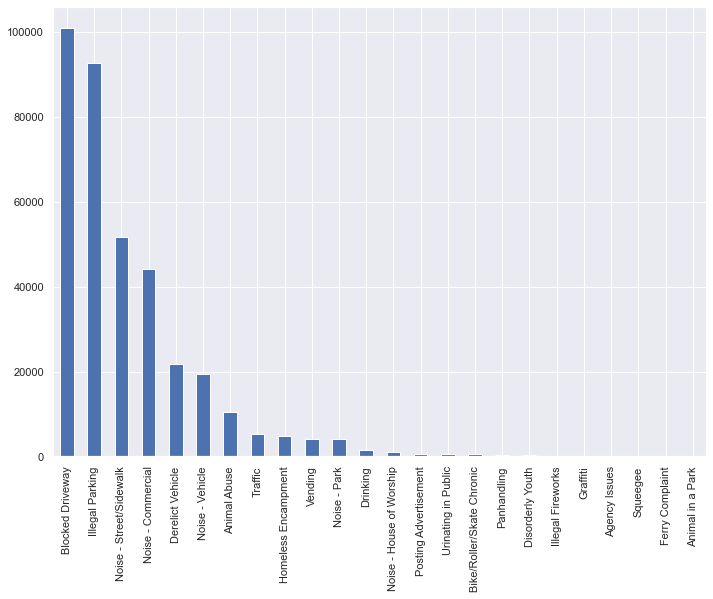

In [17]:
df['Complaint Type'].value_counts().plot(kind='bar')

In [18]:
complaints[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Name: Complaint Type, dtype: int64

In [19]:
df1=pd.DataFrame({'count':df.groupby(['Complaint Type','City']).size()}).reset_index()
df1

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
772,Vending,STATEN ISLAND,25
773,Vending,SUNNYSIDE,15
774,Vending,WHITESTONE,1
775,Vending,WOODHAVEN,6


In [20]:
groupedby_complainttype = df.groupby('Complaint Type')
groupedby_complainttype.head() 

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,...,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,...,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,...,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,...,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,...,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,...,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239986,2015-05-27 16:39:39,2015-05-27 23:31:05,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,NaN,...,NaN,Closed,06/10/2015 04:50:37 PM,Unspecified,NaN,Unspecified,Unspecified,NaN,NaN,NaN
246205,2015-05-22 14:54:06,2015-05-22 16:01:59,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,NaN,...,NaN,Closed,06/05/2015 02:59:57 PM,Unspecified,NaN,Unspecified,Unspecified,NaN,NaN,NaN
282636,2015-04-18 19:31:31,2015-04-18 20:42:16,NYPD,New York City Police Department,Squeegee,NaN,Street/Sidewalk,10018.0,INTERSECTION,NEW YORK,...,Precinct,Closed,04/19/2015 03:31:31 AM,MANHATTAN,215793.0,Unspecified,MANHATTAN,40.758978,-73.993936,"(40.75897825494627, -73.99393579583666)"
283132,2015-04-18 09:44:55,2015-05-02 10:35:29,NYPD,New York City Police Department,Animal in a Park,Animal Waste,Park,NaN,NaN,QUEENS,...,NaN,Closed,05/02/2015 09:44:55 AM,Unspecified,NaN,Alley Pond Park - Nature Center,Unspecified,NaN,NaN,NaN


Draw a frequency plot for city-wise complaints

In [21]:
df['City'].isna().sum()

2997

In [22]:
df['City'].fillna('Unknown',inplace = True)

In [23]:
df['City'].isna().sum()

0

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

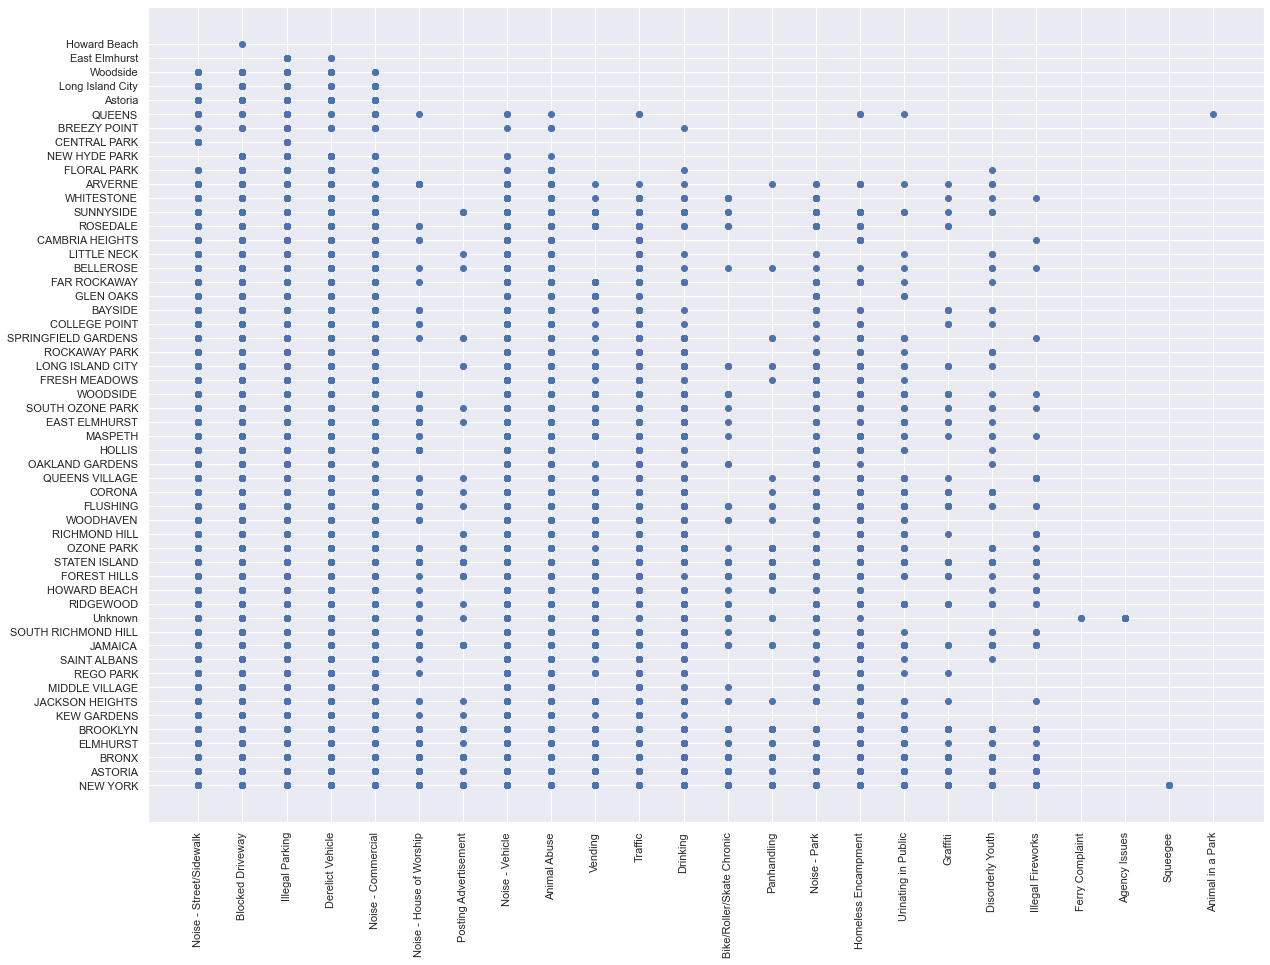

In [24]:
plt.figure(figsize=(20,15))
plt.scatter(df['Complaint Type'],df['City'])
plt.xticks(rotation=90)                     

<AxesSubplot:>

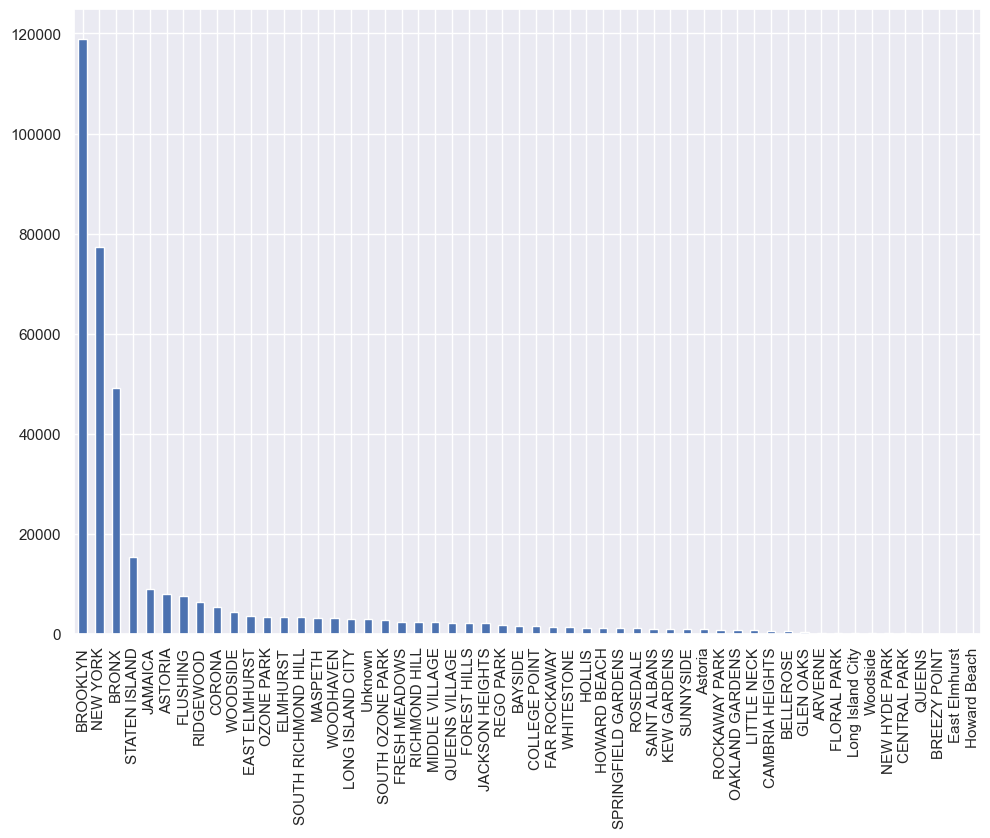

In [260]:
df['City'].value_counts().plot(kind='bar')

Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [28]:
df.loc[df['City']=="BROOKLYN"]['Complaint Type'].value_counts()

Blocked Driveway             36447
Illegal Parking              33533
Noise - Street/Sidewalk      13984
Noise - Commercial           13860
Derelict Vehicle              6259
Noise - Vehicle               5966
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

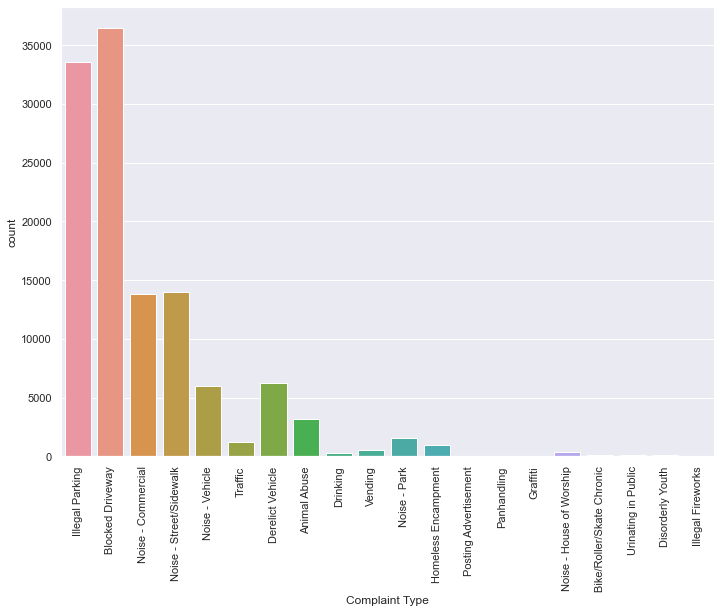

In [29]:
plot=sns.countplot(x=df.loc[df['City']=='BROOKLYN',:]['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)

<AxesSubplot:xlabel='City'>

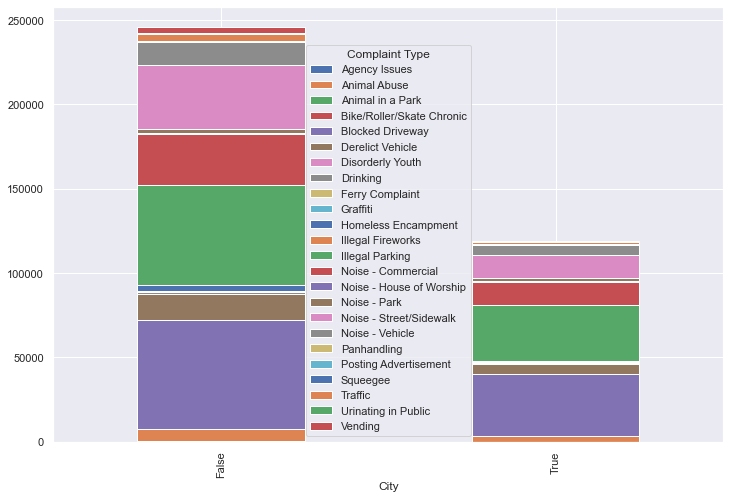

In [37]:
crosstab = pd.crosstab(index=(df['City']=='BROOKLYN'), columns=df['Complaint Type'])
crosstab.plot(kind='bar',figsize=(12,8), stacked=True)

Text(0.5, 1.0, 'complaint concentration across Brooklyn')

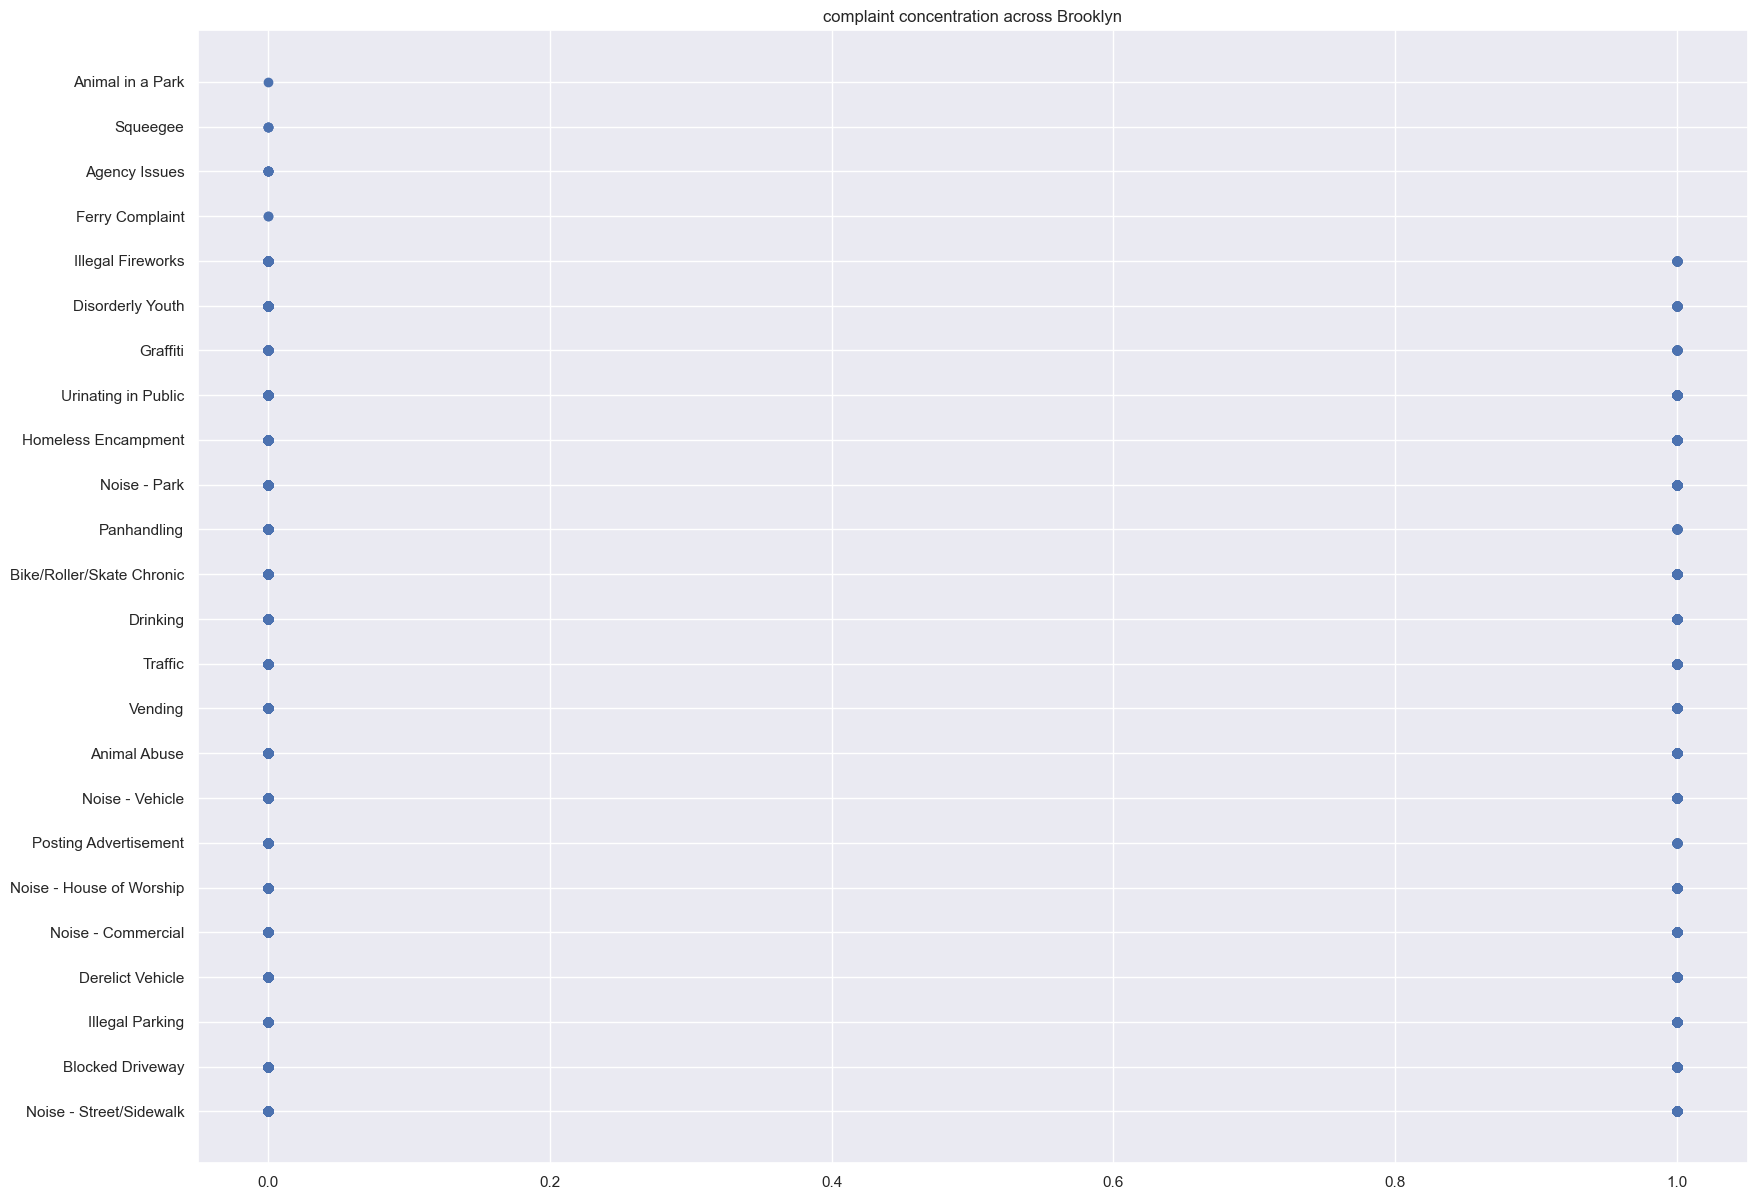

In [264]:
plt.figure(figsize=(20, 15))
plt.scatter(df['City']=='BROOKLYN',df['Complaint Type'])
plt.title('complaint concentration across Brooklyn')

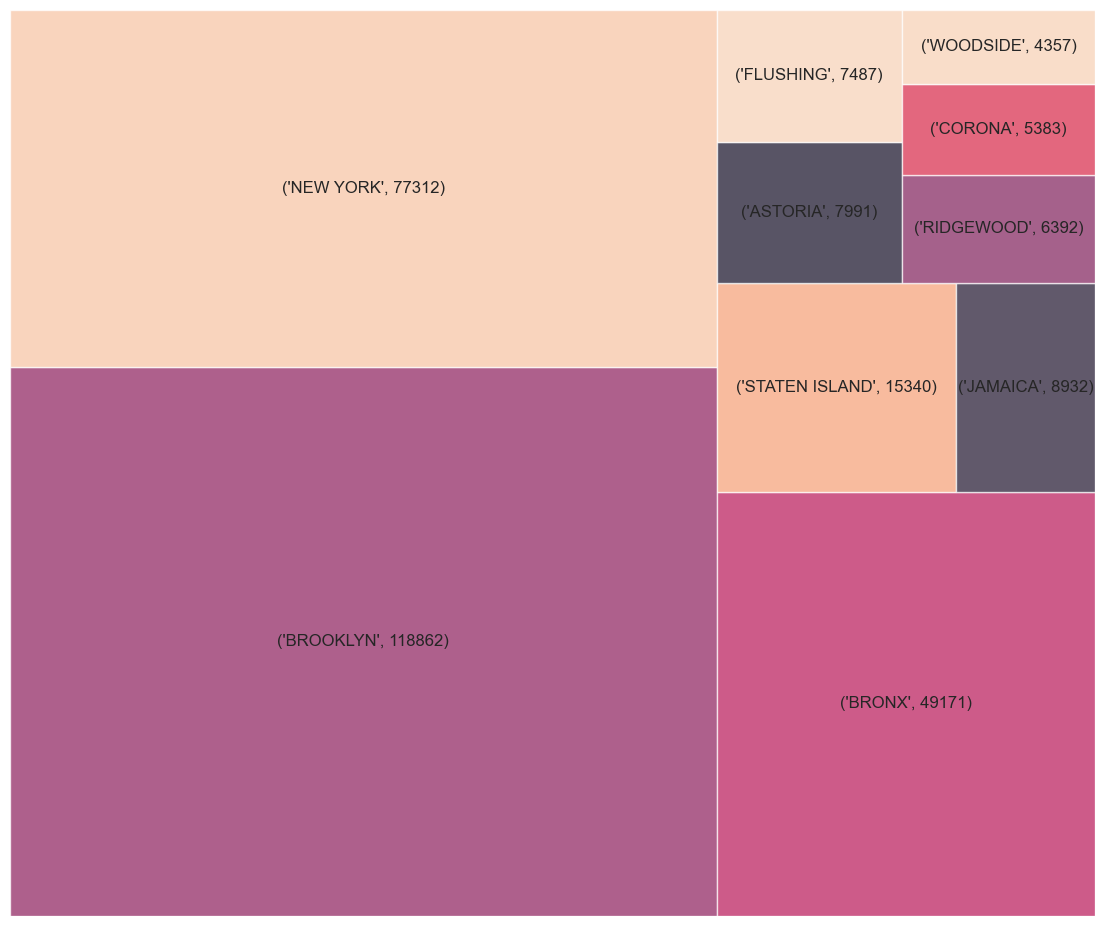

In [265]:
citywise_complaints = pd.DataFrame(df['City'].value_counts()[:10])

import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(citywise_complaints.index),citywise_complaints['City'])
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.7)
plt.axis('off')
plt.show()

In [38]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,...,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,...,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,...,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,...,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,...,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,...,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [39]:
df['Requested_date']=df['Closed Date']-df['Created Date']

In [40]:
df['Requested_closing_hour']=df['Requested_date'].astype('timedelta64[h]')+1
df[['Requested_closing_hour','Requested_date']].head()

,Requested_closing_hour,Requested_date
0,1.0,0 days 00:55:30
1,2.0,0 days 01:27:13
2,5.0,0 days 04:51:34
3,8.0,0 days 07:45:27
4,4.0,0 days 03:27:44


In [41]:
mean=df['Requested_closing_hour'].mean()
std=df['Requested_closing_hour'].std()
print(mean)
print(std)

4.704821123373378
5.8638184209082835


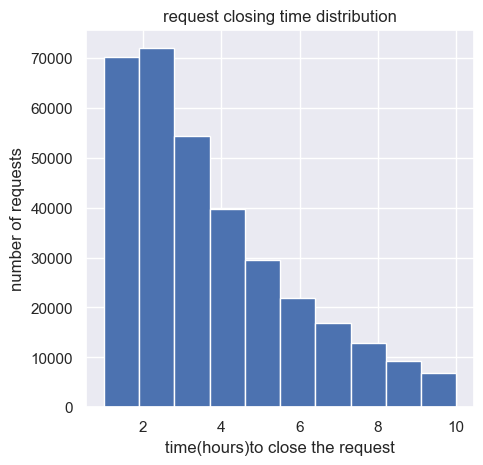

In [273]:
plt.figure(figsize=(5,5))
plot8=df[(((df['Requested_closing_hour']-mean)/std)<1)]
plot8['Requested_closing_hour'].hist(bins=10)
plt.xlabel('time(hours)to close the request')
plt.ylabel('number of requests')
plt.title('request closing time distribution')
plt.show()

In [42]:
citywise_resolution = df.groupby(['Complaint Type','Borough'])[['Requested_closing_hour']].mean().unstack()

citywise_resolution

Requested_closing_hour                      \
Borough                                    BRONX  BROOKLYN MANHATTAN   
Complaint Type                                                         
Agency Issues                                NaN       NaN       NaN   
Animal Abuse                            7.508371  5.140708  4.043277   
Animal in a Park                             NaN       NaN       NaN   
Bike/Roller/Skate Chronic               4.363636  5.209677  3.322835   
Blocked Driveway                        6.358164  4.723968  3.922395   
Derelict Vehicle                        9.256453  6.192554  4.541787   
Disorderly Youth                        4.696970  4.531646  2.728395   
Drinking                                6.199029  4.103093  3.545171   
Ferry Complaint                              NaN       NaN       NaN   
Graffiti                                8.066667  7.383333  5.280000   
Homeless Encampment                     7.667883  5.198312  4.131570   
Illegal Fireworks                       6.166667  2.918033  2.526316   
Illegal Parking                         6.733414  4.621824  3.815140   
Noise - Commercial                      5.087976  3.480115  3.204268   
Noise - House of Worship                4.966667  3.616967  2.761261   
Noise - Park                            5.198905  3.668571  3.428801   
Noise - Street/Sidewalk                 5.716036  3.780202  3.220668   
Noise - Vehicle                         5.996625  3.713328  3.089450   
Panhandling                            14.750000  4.734694  3.980583   
Posting Advertisement                   3.777778  3.862069  3.489796   
Squeegee                                     NaN       NaN  4.750000   
Traffic                                 5.240093  3.545238  3.153672   
Urinating in Public                     5.962963  4.270968  3.375000   
Vending                                 7.138568  4.953043  3.799469   

                                                               
Borough                      QUEENS STATEN ISLAND Unspecified  
Complaint Type                                                 
Agency Issues                   NaN           NaN    5.500000  
Animal Abuse               5.637121      5.173028    4.000000  
Animal in a Park                NaN           NaN  337.000000  
Bike/Roller/Skate Chronic  5.158730      4.900000    6.500000  
Blocked Driveway           4.805839      4.394728    9.517647  
Derelict Vehicle           8.650197      5.341117   15.079365  
Disorderly Youth           3.765625      4.240000         NaN  
Drinking                   4.291139      4.101064    7.000000  
Ferry Complaint                 NaN           NaN         NaN  
Graffiti                   7.078431      6.333333         NaN  
Homeless Encampment        6.311412      5.519481         NaN  
Illegal Fireworks          2.842105      4.272727         NaN  
Illegal Parking            5.088988      4.279929    9.758065  
Noise - Commercial         4.132901      3.445153   11.573529  
Noise - House of Worship   4.051576      3.222222         NaN  
Noise - Park               4.340524      3.447761    9.142857  
Noise - Street/Sidewalk    4.093783      3.425508    8.592105  
Noise - Vehicle            4.155257      3.636792    6.777778  
Panhandling                4.638889      4.769231   13.000000  
Posting Advertisement      5.263158      2.071705         NaN  
Squeegee                        NaN           NaN         NaN  
Traffic                    4.802649      3.903084         NaN  
Urinating in Public        4.691275      3.105263         NaN  
Vending                    5.319688      4.720000    6.000000

In [ ]:


fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()